In [1]:
import polars as pl
import numpy as np
import dsds.metrics as me
import dsds.prescreen as ps
import dsds.sample as sa
import dsds.fs as fs
import dsds.transform as t
import numpy as np 

In [2]:
import dsds.compare as c 

In [3]:
df = pl.read_csv("../data/train2.csv")
df.head()

ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
str,str,str,str,str,str,str,str,i64,f64,str,str,str,str,str,f64,i64,i64,f64,i64,i64,i64
"""APPC9049317122…","""Female""","""23/07/79""","""15/07/16""","""C10001""","""A""","""COM0044082""","""A""",4,2000.0,"""B001""","""P""","""N""","""S122""","""G""",0.0,null,null,null,null,0,0
"""APPD4061126334…","""Male""","""07/12/86""","""04/07/16""","""C10003""","""A""","""COM0000002""","""C""",1,3500.0,"""B002""","""P""","""Y""","""S122""","""G""",0.0,20000,2,13.25,953,10,0
"""APPE7028924942…","""Male""","""10/12/82""","""19/07/16""","""C10125""","""C""","""COM0005267""","""C""",4,2250.0,"""B003""","""G""","""Y""","""S143""","""B""",0.0,45000,4,null,null,0,0
"""APPF8027386553…","""Male""","""30/01/89""","""09/07/16""","""C10477""","""C""","""COM0004143""","""A""",4,3500.0,"""B003""","""G""","""Y""","""S143""","""B""",0.0,92000,5,null,null,7,0
"""APPG6099443664…","""Male""","""19/04/85""","""20/07/16""","""C10002""","""A""","""COM0001781""","""A""",4,10000.0,"""B001""","""P""","""Y""","""S134""","""B""",2500.0,50000,2,null,null,10,0


In [4]:
entropy, tree = c.dependency_detection(df, threshold=0.05)

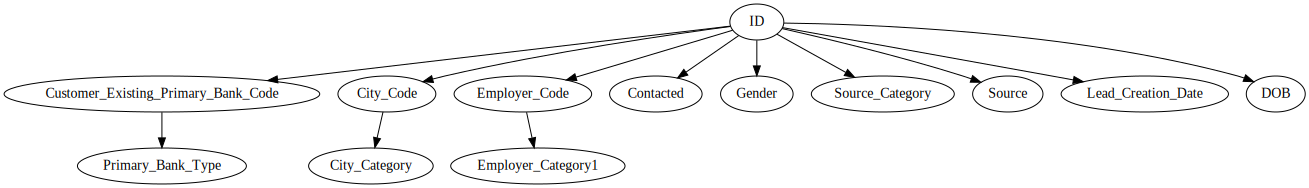

In [5]:
tree

In [ ]:
from dsds.polars_extensions.expression_lib import DSDSExprs, DSDSStr

df = pl.DataFrame({
    "a":["hello", "hellow", "helloworld"]
})
df

In [ ]:
df.to_pandas()

In [ ]:
df.group_by("indicator").agg(
    pl.col("target").mean().alias("avg_target")
)

In [ ]:
df_pd = df.to_pandas()
df_pd.groupby("indicator", dropna=False).agg({
    "target":"mean"
})

In [ ]:
df = pl.DataFrame({
    "a":["tester", "tests", "test", "testing"]
})

In [ ]:
actual = np.round(np.random.random(size=500_000)).astype(np.int8)
predicted = np.random.random(size=500_000)


In [ ]:
import numpy as np
df = pl.DataFrame({
    "a": np.random.random(size=100_000)
})

# np.random.random(size=100_000)

In [ ]:
df = pl.read_parquet("../data/dunnhumby.parquet")
df.head()

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size=0.75)

In [ ]:
train, test = train_test_split(df, train_size=0.75)

In [ ]:
df = pl.DataFrame({
    "text1":["abc,ggg", "abc,sss", "ccc,abc"],
    "text2":["aaa,bbb", "ccc,aaa", "bbb,ccc"]
})

In [ ]:
ps.infer_multicategorical(df, separator=",")

In [ ]:
df = pl.DataFrame({
    "time": ["2021-01-01", "2021-01-03", "2021-02-01","2021-02-11","2021-03-01","2021-03-02"],
    "a1": [None, 1,2,3,4, None,],
    "a2": [1,2, None,3,4, None,],
})
df = df.with_columns(pl.col("time").str.to_date())
ps.over_time_report(df, cols=["a1", "a2"], time_col="time", metrics=["null", "invalid", "min", "max"])

In [ ]:
df.select(
    pl.when(pl.col("a1")==1).then("a").when(pl.col("a2")==2).then("b").otherwise("c")
)

In [ ]:
df2 = pl.concat([df for _ in range(10000)])
df2.shape

In [ ]:
%%timeit
for frames in sa.time_window_slide(df2, "time", interval="monthly",length=3):
    first, second, third = frames

In [ ]:
df = pl.concat([pl.read_csv("../data/advertising.csv") for _ in range(10)])

In [ ]:
fs.ks_statistic(df, target="Clicked on Ad")

In [ ]:
from dsds.sklearn_compat_transfom import PolarsExprTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(transform_output = "pandas")

In [ ]:
df = df.select("Daily Time Spent on Site", "Age", "Area Income", "Male", "Clicked on Ad")

In [ ]:
df

In [ ]:
exprs = [pl.col("Age").log(), (pl.col("Clicked on Ad") + pl.lit(2)).alias("test_pl")]
pipe = Pipeline([
    ("StandardScaler", StandardScaler()),
    ("exprs", PolarsExprTransformer(exprs))
])

In [ ]:
pipe.fit(df.to_pandas())

In [ ]:
pipe.transform(df.to_pandas())

In [ ]:
df.group_by("One_Hot_Test").count()

In [ ]:
pl.show_versions()

In [ ]:
def test(value: lambda x: x+1):
    return value 

In [ ]:
test(1)

In [ ]:
test = pl.DataFrame(
    {
        "a":[["a", None], ["b", None]]
    }
)

test.select(
    pl.col("a").list.set_difference(pl.Series("test", [None]))
)

In [ ]:
df = pl.read_csv("../data/advertising.csv")
df.head()

In [ ]:
a = np.random.random(size=(5000,))
b = np.random.random(size=(5000,))

In [ ]:
me.psi(a,b)

In [ ]:
predicted = np.random.random(size=(5000,3))
actual = np.round(np.random.random(size=(5000,3))).astype(np.int8)

In [ ]:
me.precision_recall(actual, predicted)

In [ ]:
df = pl.DataFrame({
    "predicted": predicted[:, 1],
    "actual": actual[:, 1]
})

In [ ]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(actual, predicted, average="weighted"))
print(me.roc_auc(actual, predicted, strategy="balanced"))

In [ ]:
df2 = (
    df.lazy().select(["Area Income", "Ad Topic Line", "City", "Clicked on Ad"])
    .drop(["Ad Topic Line"])
).collect()

In [ ]:
df2.show_graph()

In [ ]:
from scipy.fft import fft
a = np.array([1,2,3,1,2,3,1,2,3])
fft(a)

In [ ]:
df = pl.read_csv("../data/train.csv").with_columns(
    pl.lit(1).alias("feature_1"),
    pl.lit(2).alias("feature_2")
)